The following is used once (the first time you run the code) to install the package (library).

In [11]:
install.packages("pixmap")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



Load the required libraries. `svd` is a base function, so does not require a specific library.

In [12]:
library(bmp)
library(pixmap)

Now load the image using `read.bmp` (from the `bmp` library).

In [13]:
my_image = read.bmp("Julien_and_friend_1000x800.bmp")
dim(my_image)

[1]  800 1000    3

Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”


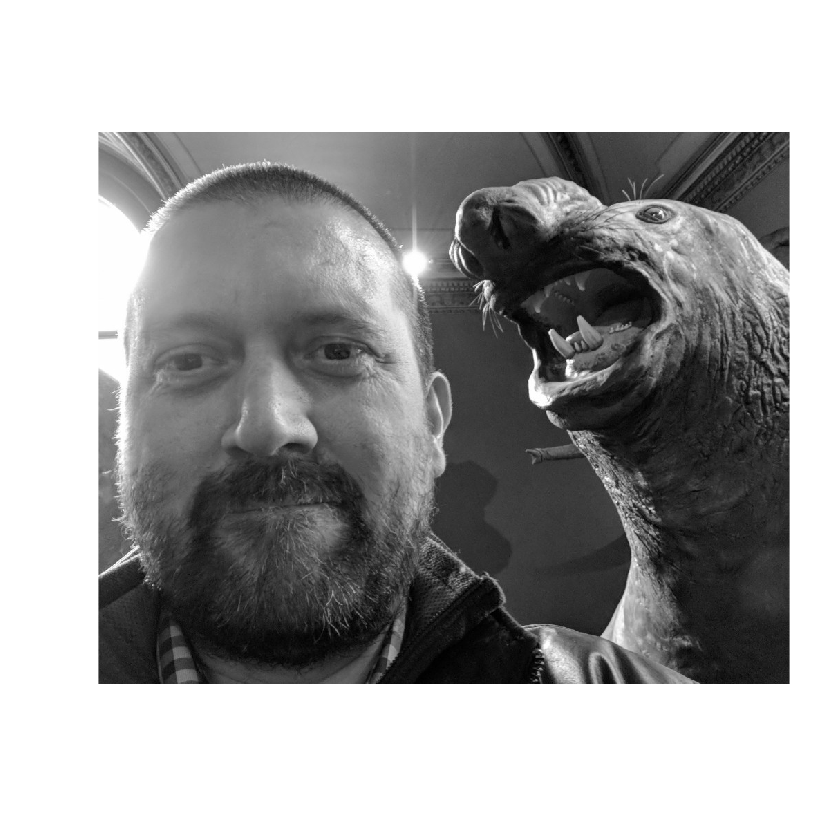

In [14]:
my_image_g = pixmapGrey(my_image)
plot(my_image_g)

In [15]:
my_image_g

Pixmap image
  Type          : pixmapGrey 
  Size          : 800x1000 
  Resolution    : 1x1 
  Bounding box  : 0 0 1000 800 


In [16]:
M = my_image_g@grey

In [17]:
M.svd = svd(M)

In [18]:
names(M.svd)
length(M.svd$d)
dim(M.svd$u)
dim(M.svd$v)

[1] "d" "u" "v"

[1] 800

[1] 800 800

[1] 1000  800

In [19]:
compress_image = function(im, n) {
    # Given an image im on which the svd has been used, "compress" it by keeping only the 
    # first n singular values
    if (n > length(im$d)) {
        # Check that we gave a value of n within range, otherwise just set to the max
        n = length(im$d)
    }
    d_tmp = im$d[1:n]
    u_tmp = im$u[,1:n]
    v_tmp = im$v[,1:n]
    # We store the results in a list (so we can return other information)
    out = list()
    # First, compute the resulting image
    out$img = mat.or.vec(nr = dim(im$u)[1], nc = dim(im$v)[1])
    for (i in 1:n) {
        out$img = out$img + d_tmp[i] * u_tmp[,i] %*% t(v_tmp[,i]) 
    }
    # Values of the "colours" must be between 0 and 1, so we shift and rescale
    if (min(min(out$img)) < 0 ) {
        out$img = out$img - min(min(out$img))
    }
    out$img = out$img / max(max(out$img))
    # Store some information: number of points needed and percentage of the original required
    out$nb_pixels_original = dim(im$u)[1] * dim(im$v)[2]
    out$nb_pixels_compressed = length(d_tmp) + dim(u_tmp)[1]*dim(u_tmp)[2] + dim(v_tmp)[1]*dim(v_tmp)[2] 
    out$pct_of_original = out$nb_pixels_compressed / out$nb_pixels_original * 100
    # Return the result
    return(out)
}

[1] 42.21094

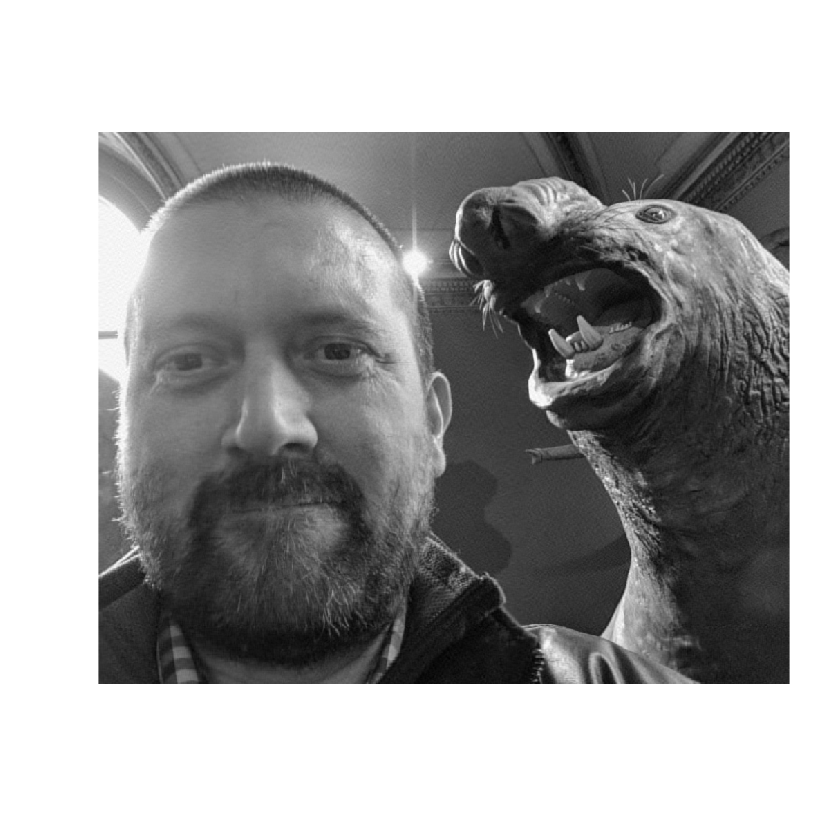

In [25]:
new_image = my_image_g
M_tmp = compress_image(M.svd, 150)
new_image@grey = M_tmp$img
plot(new_image)
M_tmp$pct_of_original